In [1]:
#---------------------------------------------------
# Importing Required Library and Version
#--------------------------------------------------

import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn


print('Python Version : {}'.format(sys.version))
print('Numpy Version : {}'.format(numpy.__version__))
print('Pandas Version : {}'.format(pandas.__version__))
print('Matplotlib Version : {}'.format(matplotlib.__version__))
print('SeaBorn Version : {}'.format(seaborn.__version__))
print('Scipy Version : {}'.format(scipy.__version__))
print('Sklearn Version : {}'.format(sklearn.__version__))

Python Version : 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Numpy Version : 1.14.2
Pandas Version : 0.22.0
Matplotlib Version : 2.2.4
SeaBorn Version : 0.8.1
Scipy Version : 1.0.0
Sklearn Version : 0.19.1


In [2]:
#---------------------------------------------------
# Library with Alias
#--------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#---------------------------------------------------
# Import Data sets
#---------------------------------------------------
#data = pd.read_csv(r"C:\Users\SONY\ARIMA\Sales_Records.csv")
review_train = pd.read_csv(r"C:\Users\SONY\Amazon_Topic_Modelling\train.csv")
print(review_train)

                                            Review Text  \
0     Did nothing for me, didn't help lost even with...   
1     Did nothing for me, didn't help lost even with...   
2     I have bought these bags and  immediately open...   
3            Gave me an allergic reaction on my face :(   
4     These don't compare to the name brand wipes. F...   
5     These don't compare to the name brand wipes. F...   
6     These don't compare to the name brand wipes. F...   
7                                               No good   
8     These are EXTREMELY hard to swallow. The pills...   
9     First of all the style I am leaving a review f...   
10    First of all the style I am leaving a review f...   
11    First of all the style I am leaving a review f...   
12    These smelled horrible! As soon as I opened th...   
13    Super easy these don’t work and definitely doe...   
14    Super easy these don’t work and definitely doe...   
15    By my lights, these are a big disappointment. ... 

In [31]:
import re
def remove_name(txt,pattern):
    r = re.findall(pattern,txt)
    for i in r:
        txt = re.sub(i,'',txt)
    return txt

review_train['Updated Reviews'] = np.vectorize(remove_name)(review_train['Review Text'], "@â€™")


In [32]:
print(review_train)

                                            Review Text  \
0     Did nothing for me, didn't help lost even with...   
1     Did nothing for me, didn't help lost even with...   
2     I have bought these bags and  immediately open...   
3            Gave me an allergic reaction on my face :(   
4     These don't compare to the name brand wipes. F...   
5     These don't compare to the name brand wipes. F...   
6     These don't compare to the name brand wipes. F...   
7                                               No good   
8     These are EXTREMELY hard to swallow. The pills...   
9     First of all the style I am leaving a review f...   
10    First of all the style I am leaving a review f...   
11    First of all the style I am leaving a review f...   
12    These smelled horrible! As soon as I opened th...   
13    Super easy these don’t work and definitely doe...   
14    Super easy these don’t work and definitely doe...   
15    By my lights, these are a big disappointment. ... 

In [38]:
review_train['Updated Reviews'] = review_train['Updated Reviews'].str.replace("[^a-zA-Z#]"," ")
review_train['Updated Reviews'] = review_train['Updated Reviews'].apply(lambda x:' '.join([w for w in x.split() if len(w)>1]))

In [39]:
print(review_train)

                                            Review Text  \
0     nothing didn help lost even with working eatin...   
1     nothing didn help lost even with working eatin...   
2     have bought these bags immediately open some t...   
3                           Gave allergic reaction face   
4     These compare name brand wipes Family little k...   
5     These compare name brand wipes Family little k...   
6     These compare name brand wipes Family little k...   
7                                                  good   
8     These EXTREMELY hard swallow pills huge sides ...   
9     First style leaving review Solimo incontinent ...   
10    First style leaving review Solimo incontinent ...   
11    First style leaving review Solimo incontinent ...   
12    These smelled horrible soon opened bottle smel...   
13    Super easy these work definitely doesn give en...   
14    Super easy these work definitely doesn give en...   
15    lights these disappointment Finding good veggi... 

In [42]:
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

review_train['Updated Reviews'] = preprocess_reviews(review_train['Updated Reviews'])

In [44]:
print(review_train)

                                            Review Text  \
0     nothing didn help lost even with working eatin...   
1     nothing didn help lost even with working eatin...   
2     have bought these bags immediately open some t...   
3                           Gave allergic reaction face   
4     These compare name brand wipes Family little k...   
5     These compare name brand wipes Family little k...   
6     These compare name brand wipes Family little k...   
7                                                  good   
8     These EXTREMELY hard swallow pills huge sides ...   
9     First style leaving review Solimo incontinent ...   
10    First style leaving review Solimo incontinent ...   
11    First style leaving review Solimo incontinent ...   
12    These smelled horrible soon opened bottle smel...   
13    Super easy these work definitely doesn give en...   
14    Super easy these work definitely doesn give en...   
15    lights these disappointment Finding good veggi... 

In [45]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokens = review_train['Updated Reviews'].apply(lambda x : x.split())
tokens = tokens.apply(lambda x : [stemmer.stem(iterator) for iterator in x ])
#tokens.head()
for i in range(len(tokens)):
    tokens[i] = ' '.join(tokens[i])
review_train['Updated Reviews']= tokens
review_train.head()

,Review Text,Review Title,topic,Updated Reviews
0,nothing didn help lost even with working eatin...,Useless,Shipment and delivery,did noth for me didn help lost even with work ...
1,nothing didn help lost even with working eatin...,Useless,Not Effective,did noth for me didn help lost even with work ...
2,have bought these bags immediately open some t...,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service,have bought these bag and immedi open one put ...
3,Gave allergic reaction face,Do not recommend,Allergic,gave me an allerg reaction on my face
4,These compare name brand wipes Family little k...,Can't tackle big messes,Texture,these don compar to the name brand wipe famili...


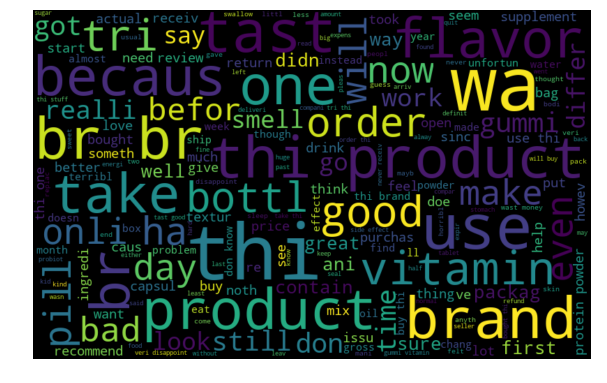

In [46]:
from wordcloud import WordCloud 
#allwords = ' '.join([text for text in review_train['Review Text']]) 
allwordschanged = ' '.join([text for text in review_train['Updated Reviews']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allwordschanged)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()